<b>SUPERVISED LEARNING</b><br>
--
<b>Created by : Andi-Nov</b><br><br>
<i>T-test, support vector machine, gradient boosting, random forest, and KNN</i><br><br>
In this project, I will use machine learning algorithm to predict facies type (classes of rocks) from well log data. The labeled well log data are from real wells of Council Grove gas reservoir in Southwest Kansas. The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas. There are totally seven features for each well log: gamma ray (GR), resistivity logging (ILD_log10), photoelectric effect (PE), neutron-density porosity difference, average neutron-density porosity (DeltaPHI and PHIND), nonmarine-marine indicator (NM_M), and relative position (RELPOS). Those seven features will be used as predictor variables.<br>
Designed t-test flow to evaluate the prediction performance

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

url = 'https://drive.google.com/file/d/19UU1UL6J-VfnV29AQoVlpWaqoVOdywPO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [4]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [6]:
# List the unique keys!
print(data['Well Name'].unique())

['SHRIMPLIN' 'ALEXANDER D' 'SHANKLE' 'LUKE G U' 'KIMZEY A'
 'CROSS H CATTLE' 'NOLAN' 'Recruit F9' 'NEWBY' 'CHURCHMAN BIBLE']


In [7]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [8]:
data.corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.306688,-0.386677,0.383166,-0.235005,-0.356453,0.704231,0.852721,0.076761
Depth,0.306688,1.000000,-0.088636,0.202272,0.067694,-0.095834,0.277577,0.282318,0.001537
GR,-0.386677,-0.088636,1.000000,-0.205855,0.178863,0.270729,-0.289023,-0.316284,-0.182051
ILD_log10,0.383166,0.202272,-0.205855,1.000000,-0.104827,-0.544416,0.384589,0.493570,0.088227
DeltaPHI,-0.235005,0.067694,0.178863,-0.104827,1.000000,-0.189355,0.011489,-0.177500,0.022470
PHIND,-0.356453,-0.095834,0.270729,-0.544416,-0.189355,1.000000,-0.573418,-0.481024,-0.033328
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.852721,0.282318,-0.316284,0.493570,-0.177500,-0.481024,0.657089,1.000000,0.034015
RELPOS,0.076761,0.001537,-0.182051,0.088227,0.022470,-0.033328,0.018905,0.034015,1.000000


In [13]:
# Drop some feature!
data_dropna = data.dropna(axis=0)
data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 303.0+ KB


In [14]:
# Check again the uniques
data_dropna['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

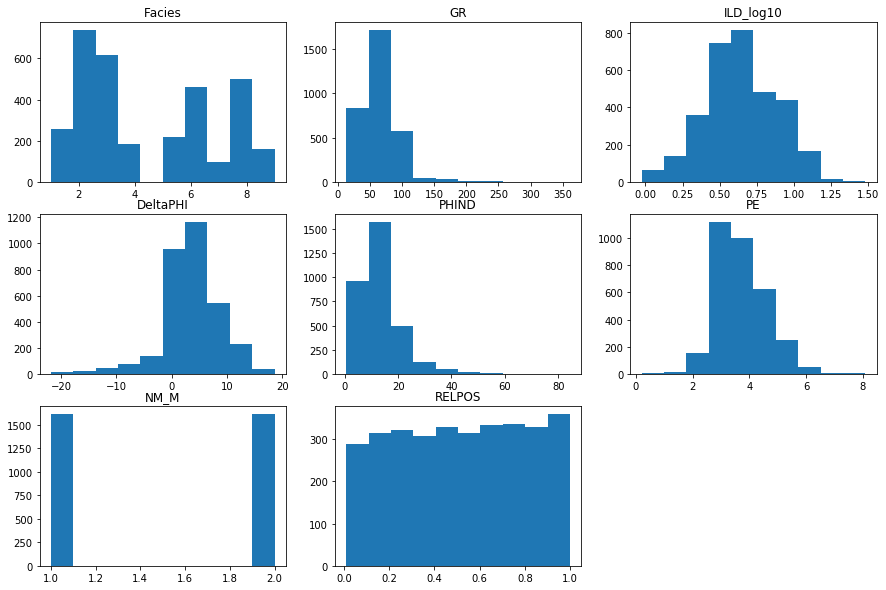

In [15]:
col_list = ['Facies', 'GR',	'ILD_log10',	'DeltaPHI',	'PHIND',	'PE',	'NM_M',	'RELPOS']
plt.figure(figsize=(15,10))
i=0
for col in col_list:
  i+=1
  plt.subplot(3,3,i)
  plt.hist(data_dropna[col])
  plt.title(col)
plt.show()

1    259
2    738
3    615
4    184
5    217
6    462
7     98
8    498
9    161
Name: Facies, dtype: int64


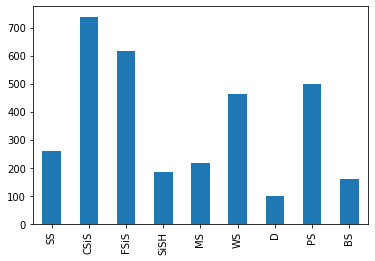

In [16]:
data_dropna['Facies'].value_counts().sort_index().plot(kind='bar')
print(data_dropna['Facies'].value_counts().sort_index())
X_ind = np.arange(0,9,1)
plt.xticks(X_ind,['SS', 'CSiS', 'FSiS', 'SiSH', 'MS', 'WS','D','PS','BS'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report

test_well = data_dropna[data['Well Name']=='SHANKLE']
data_4mod = data_dropna[data['Well Name']!='SHANKLE']
features = ['GR',	'ILD_log10',	'DeltaPHI',	'PHIND',	'PE',	'NM_M',	'RELPOS']
y = data_4mod['Facies']
X = data_4mod[features]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [19]:
scaler = StandardScaler().fit(X)
X_stnd = scaler.transform(X)

In [20]:
# Now split them
X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.05, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [21]:
y_test_well = test_well['Facies']
X_test_well = test_well[features]
X_test_well_stnd = scaler.transform(X_test_well)

In [22]:
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

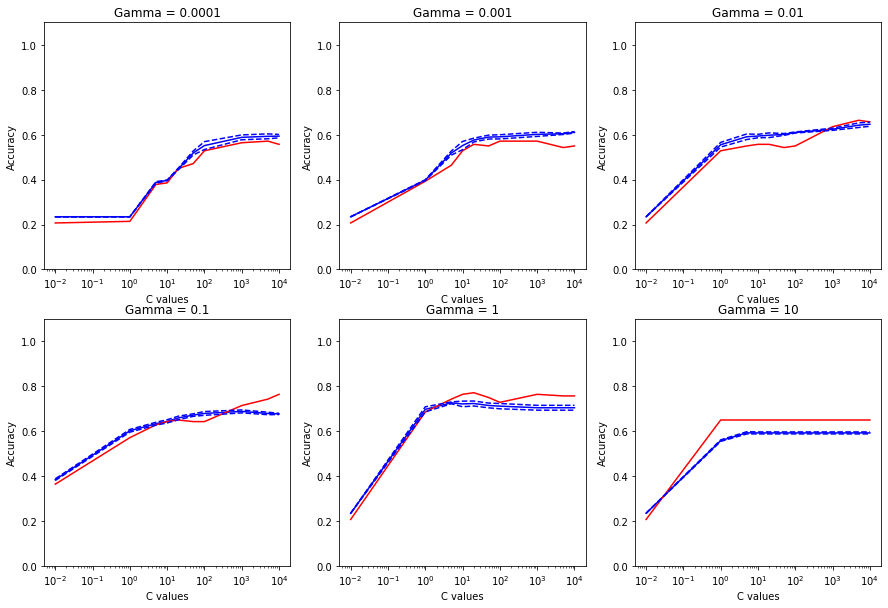

In [23]:
# SVM!
c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

i = 0
plt.figure(figsize=(15,10))

for gamma_value in gamma_list:

  i = i + 1
  scores = list()
  score_stds = list()
  score_tests = list()

  for c_value in c_list:

    clf_cv = SVC(C=c_value, gamma=gamma_value)
    cv_score = cross_val_score(clf_cv, X_train, y_train)
    scores.append(np.mean(cv_score))
    score_stds.append(np.std(cv_score))
    clf_cv.fit(X_train, y_train)
    score_test = clf_cv.score(X_test, y_test)
    score_tests.append(score_test)

  plt.subplot(2,3,i)
  plt.semilogx(c_list, scores, 'b')
  plt.semilogx(c_list, score_tests, 'r')
  plt.semilogx(c_list, np.array(scores)+np.array(score_stds), 'b--')
  plt.semilogx(c_list, np.array(scores)+-np.array(score_stds), 'b--')
  plt.title('Gamma = {}'.format(gamma_value))
  plt.xlabel('C values')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)

plt.show()

In [24]:
# Classifier training
clf = SVC(C=10, gamma=1)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

          SS       1.00      0.69      0.81        16
        CSiS       0.83      0.86      0.85        29
        FSiS       0.65      0.93      0.76        14
        SiSH       0.44      0.57      0.50         7
          MS       0.83      0.56      0.67        18
          WS       0.65      0.74      0.69        23
           D       0.50      0.33      0.40         3
          PS       0.83      0.83      0.83        23
          BS       1.00      1.00      1.00         7

    accuracy                           0.76       140
   macro avg       0.75      0.72      0.72       140
weighted avg       0.79      0.76      0.76       140

Normalized confusion matrix


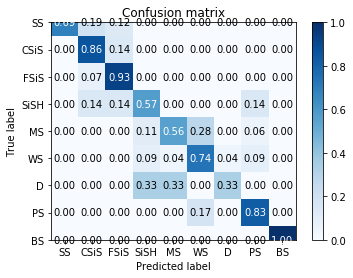

In [25]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred_test = clf.predict(X_test)
target_list = ['SS', 'CSiS', 'FSiS', 'SiSH', 'MS', 'WS','D','PS','BS']
print(classification_report(y_test, pred_test, target_names=target_list))
cm_test_SVM = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test_SVM, target_list, normalize=True)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


              precision    recall  f1-score   support

          SS       0.30      0.08      0.12        89
        CSiS       0.36      0.72      0.48        89
        FSiS       0.62      0.54      0.58       117
        SiSH       0.25      0.29      0.27         7
          MS       0.17      0.11      0.13        19
          WS       0.66      0.54      0.59        71
           D       0.71      0.29      0.42        17
          PS       0.41      0.60      0.49        40
          BS       0.00      0.00      0.00         0

    accuracy                           0.46       449
   macro avg       0.39      0.35      0.34       449
weighted avg       0.47      0.46      0.43       449

Normalized confusion matrix


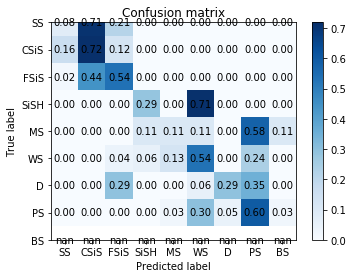

In [27]:
pred_test_well = clf.predict(X_test_well_stnd)
print(classification_report(y_test_well, pred_test_well, target_names=target_list))
cm_SVM = confusion_matrix(y_test_well, pred_test_well)
plot_confusion_matrix(cm_SVM, target_list, normalize=True)

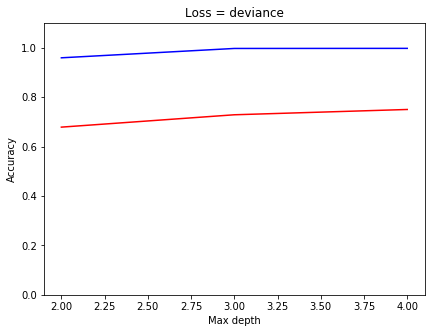

In [28]:
# Gradient Boosting
loss_list = ['deviance']
max_depths = [2, 3, 4]

i = 0
plt.figure(figsize=(15,5))

for los in loss_list:

  i = i + 1
  scores = list()
  score_tests = list()

  for depth in max_depths:

    params = {'loss': los, 
          'learning_rate': 0.1, 
          'n_estimators': 500, 
          'max_depth': depth, 
          'subsample': 1, 
          'min_samples_split': 2 
          }
    clf_cv = ensemble.GradientBoostingClassifier(**params)
    clf_cv.fit(X1_train, y1_train)
    cv_score = clf_cv.score(X1_train, y1_train)
    scores.append(np.mean(cv_score))
    score_test = clf_cv.score(X1_test, y1_test)
    score_tests.append(score_test)

  plt.subplot(1,2,i)
  plt.plot(max_depths, scores, 'b')
  plt.plot(max_depths, score_tests, 'r')
  plt.title('Loss = {}'.format(los))
  plt.xlabel('Max depth')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)

plt.show()

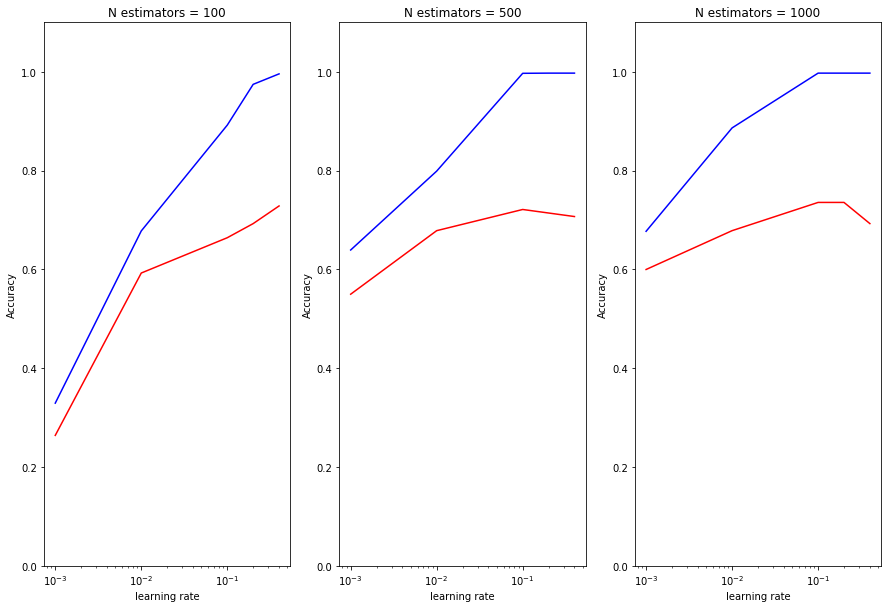

In [29]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.4]
n_estimators_list = [100, 500, 1000]

i = 0
plt.figure(figsize=(15,10))

for est in n_estimators_list:

  i = i + 1
  scores = list()
  score_tests = list()

  for rate in learning_rates:

    params = {'loss': 'deviance', 
          'learning_rate': rate, 
          'n_estimators': est, 
          'max_depth': 3, 
          'subsample': 1, 
          'min_samples_split': 2 
          }
    clf_cv = ensemble.GradientBoostingClassifier(**params)
    clf_cv.fit(X1_train, y1_train)
    cv_score = clf_cv.score(X1_train, y1_train)
    scores.append(np.mean(cv_score))
    score_test = clf_cv.score(X1_test, y1_test)
    score_tests.append(score_test)

  plt.subplot(1,3,i)
  plt.semilogx(learning_rates, scores, 'b')
  plt.semilogx(learning_rates, score_tests, 'r')
  plt.title('N estimators = {}'.format(est))
  plt.xlabel('learning rate')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)

plt.show()

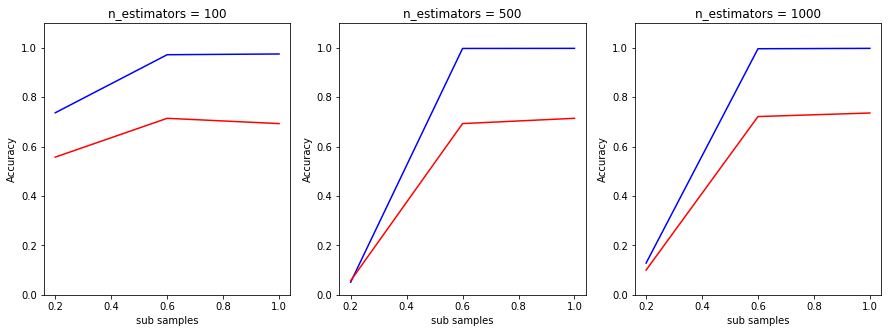

In [30]:
# Now we train again!
subsamples = [0.2, 0.6, 1]
n_estimators_list = [100, 500, 1000]

i = 0
plt.figure(figsize=(15,5))

for est in n_estimators_list:

  i = i + 1
  scores = list()
  score_tests = list()

  for sub in subsamples:

    params = {'loss': 'deviance', 
          'learning_rate': 0.2, 
          'n_estimators': est,
          'max_depth': 3, 
          'subsample': sub, 
          'min_samples_split': 2 
          }
    clf_cv = ensemble.GradientBoostingClassifier(**params)
    clf_cv.fit(X_train, y_train)
    cv_score = clf_cv.score(X_train, y_train)
    scores.append(np.mean(cv_score))
    score_test = clf_cv.score(X_test, y_test)
    score_tests.append(score_test)

  plt.subplot(1,3,i)
  plt.plot(subsamples, scores, 'b')
  plt.plot(subsamples, score_tests, 'r')
  plt.title('n_estimators = {}'.format(est))
  plt.xlabel('sub samples')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)

plt.show()

In [31]:
params = {'loss': 'deviance', 
          'learning_rate': 0.2, 
          'n_estimators': 1000, 
          'max_depth': 3, 
          'subsample': 0.6, 
          'min_samples_split': 2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
print(cross_val_score(clf_GB, X1_train, y1_train, cv=5))

[0.67735849 0.72641509 0.66792453 0.62689394 0.65333333]


              precision    recall  f1-score   support

           1       1.00      0.56      0.72        16
           2       0.71      0.83      0.76        29
           3       0.65      0.79      0.71        14
           4       0.67      0.57      0.62         7
           5       0.89      0.44      0.59        18
           6       0.59      0.70      0.64        23
           7       0.75      1.00      0.86         3
           8       0.75      0.78      0.77        23
           9       0.70      1.00      0.82         7

    accuracy                           0.71       140
   macro avg       0.74      0.74      0.72       140
weighted avg       0.74      0.71      0.71       140

Normalized confusion matrix


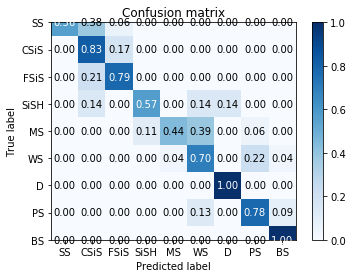

In [32]:
params = {'loss': 'deviance', 
          'learning_rate': 0.2, 
          'n_estimators': 1000, 
          'max_depth': 3,
          'subsample': 0.6,
          'min_samples_split': 2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
clf_GB.fit(X1_train, y1_train)
preds_GB = clf_GB.predict(X1_test)
print(classification_report(y1_test, preds_GB))
cm_test_GB = confusion_matrix(y1_test, preds_GB)
plot_confusion_matrix(cm_test_GB, target_list, normalize=True)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


              precision    recall  f1-score   support

          SS       0.43      0.07      0.12        89
        CSiS       0.35      0.73      0.47        89
        FSiS       0.77      0.63      0.69       117
        SiSH       0.07      0.14      0.09         7
          MS       0.10      0.11      0.10        19
          WS       0.62      0.56      0.59        71
           D       0.42      0.29      0.34        17
          PS       0.49      0.47      0.48        40
          BS       0.00      0.00      0.00         0

    accuracy                           0.47       449
   macro avg       0.36      0.33      0.32       449
weighted avg       0.52      0.47      0.45       449

Normalized confusion matrix


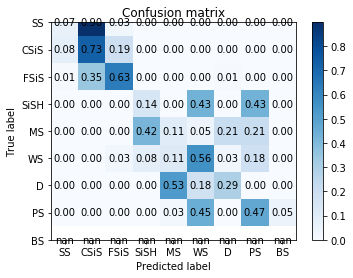

In [33]:
# GB blind prediction!
pred_GB_test_well = clf_GB.predict(X_test_well)
print(classification_report(y_test_well, pred_GB_test_well, target_names=['SS', 'CSiS', 'FSiS', 'SiSH', 'MS', 'WS','D','PS', 'BS']))
cm_GB = confusion_matrix(y_test_well, pred_GB_test_well)
plot_confusion_matrix(cm_GB, target_list, normalize=True)

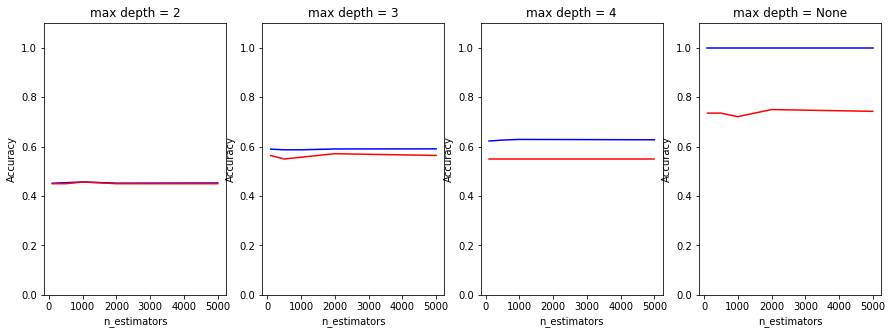

In [35]:
# This's the last
# Random Forest
max_depths = [2, 3, 4]
n_estimators_list = [100, 500, 1000, 2000, 5000]

i = 0
plt.figure(figsize=(15,5))

for depth in max_depths:

  i = i + 1
  scores = list()
  score_tests = list()

  for est in n_estimators_list:

    params = {'n_estimators': est, 
          'max_depth': depth, 
          }
    clf_cv = ensemble.RandomForestClassifier(**params)
    clf_cv.fit(X1_train, y1_train)
    cv_score = clf_cv.score(X1_train, y1_train)
    scores.append(np.mean(cv_score))
    score_test = clf_cv.score(X1_test, y1_test)
    score_tests.append(score_test)

  plt.subplot(1,4,i)
  plt.plot(n_estimators_list, scores, 'b')
  plt.plot(n_estimators_list, score_tests, 'r')
  plt.title('max depth = {}'.format(depth))
  plt.xlabel('n_estimators')
  plt.ylabel('Accuracy')
  plt.ylim(0,1.1)

scores = list()
score_tests = list()
for est in n_estimators_list:
  clf_cv = ensemble.RandomForestClassifier(n_estimators=est)
  clf_cv.fit(X1_train, y1_train)
  cv_score = clf_cv.score(X1_train, y1_train)
  scores.append(np.mean(cv_score))
  score_test = clf_cv.score(X1_test, y1_test)
  score_tests.append(score_test)
plt.subplot(1,4,4)
plt.plot(n_estimators_list, scores, 'b')
plt.plot(n_estimators_list, score_tests, 'r')
plt.title('max depth = {}'.format('None'))
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.show()

[0.70943396 0.75849057 0.71320755 0.73106061 0.71428571]
              precision    recall  f1-score   support

           1       1.00      0.62      0.77        16
           2       0.74      0.90      0.81        29
           3       0.73      0.79      0.76        14
           4       0.56      0.71      0.63         7
           5       0.88      0.39      0.54        18
           6       0.64      0.70      0.67        23
           7       1.00      1.00      1.00         3
           8       0.67      0.78      0.72        23
           9       0.88      1.00      0.93         7

    accuracy                           0.74       140
   macro avg       0.79      0.77      0.76       140
weighted avg       0.76      0.74      0.73       140

Normalized confusion matrix


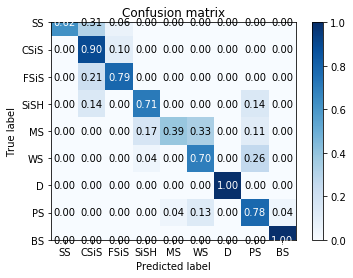

In [36]:
# Classifier training
clf_RF = ensemble.RandomForestClassifier(n_estimators=2000)
print(cross_val_score(clf_RF, X1_train, y1_train, cv=5))
clf_RF.fit(X1_train, y1_train)
preds_RF = clf_RF.predict(X1_test)
print(classification_report(y1_test, preds_RF))
cm_test_RF = confusion_matrix(y1_test, preds_RF)
plot_confusion_matrix(cm_test_RF, target_list, normalize=True)

              precision    recall  f1-score   support

           1       0.33      0.04      0.08        89
           2       0.35      0.78      0.48        89
           3       0.84      0.64      0.73       117
           4       0.07      0.14      0.09         7
           5       0.33      0.16      0.21        19
           6       0.68      0.65      0.66        71
           7       0.92      0.65      0.76        17
           8       0.54      0.65      0.59        40

    accuracy                           0.52       449
   macro avg       0.51      0.46      0.45       449
weighted avg       0.56      0.52      0.50       449

Normalized confusion matrix


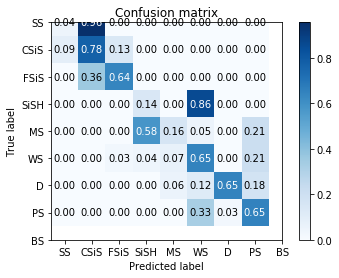

In [37]:
# Blind prediction!
preds_RF_test_well = clf_RF.predict(X_test_well)
print(classification_report(y_test_well, preds_RF_test_well))
cm_RF = confusion_matrix(y_test_well, preds_RF_test_well)
plot_confusion_matrix(cm_RF, target_list, normalize=True)